In [1]:
import pandas as pd

In [2]:
organes = pd.read_csv('../out/organes.csv')
acteurs = pd.read_csv('../out/acteurs.csv')
reunions = pd.read_csv('../out/reunions.csv')
interventions = pd.read_csv('../out/interventions.csv')
votes = pd.read_csv('../out/votes.csv')

In [3]:
reunions = (
    reunions
    .set_index('uid')
)

In [4]:
acteurs_extra = (
    acteurs.set_index('uid')
)

acteurs_extra

,nom,prenom,civ
uid,,,
PA721670,de Montchalin,Amélie,Mme
PA794038,Neuder,Yannick,M.
PA793342,Martin,Alexandra,Mme
PA775168,Anglars,Jean-Claude,M.
PA775216,Drexler,Sabine,Mme
...,...,...,...
PA794386,Métayer,Lysiane,Mme
PA794410,Seitlinger,Vincent,M.
PA721608,Bourlanges,Jean-Louis,M.


In [10]:
votes

,acteurRef,mandatRef,parDelegation,position,organe,date,scrutin,groupe_majorite
0,PA643184,PM797142,False,pour,PO800538,2023-05-30,VTANR5L16V1709,pour
1,PA340643,PM796335,False,pour,PO800538,2023-05-30,VTANR5L16V1709,pour
2,PA2449,PM797046,False,pour,PO800538,2023-05-30,VTANR5L16V1709,pour
3,PA793194,PM796200,False,pour,PO800538,2023-05-30,VTANR5L16V1709,pour
4,PA719118,PM796416,False,pour,PO800538,2023-05-30,VTANR5L16V1709,pour
...,...,...,...,...,...,...,...,...
348459,PA795184,PM797346,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention
348460,PA795998,PM797796,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention
348461,PA796010,PM797802,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention
348462,PA774962,PM797766,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention


In [15]:
deputes_organe_libelle = (
    votes
    .groupby('acteurRef')
    .agg({ 'organe': 'first' })
    .join(organes.set_index('uid')[['libelleAbrev']], on='organe')
)

deputes_organe_libelle

,organe,libelleAbrev
acteurRef,,
PA1008,PO800496,SOC
PA1206,PO793087,NI
PA1327,PO800508,LR
PA1567,PO800496,SOC
PA1592,PO793087,NI
...,...,...
PA805166,PO800484,DEM
PA817203,PO800538,RE
PA817211,PO800490,LFI-NUPES


In [16]:
interventions_extra = (
    interventions
    .join(reunions[['cr']], on='seance')
    .join(acteurs_extra[['nom', 'civ']], on='acteur')
    .join(deputes_organe_libelle, on='acteur')
    .assign(
       url_seance = lambda df: df.cr.apply(lambda id: f'https://www.assemblee-nationale.fr/dyn/16/comptes-rendus/seance/{id}'),
    )
    .assign(
        url_intervention = lambda df: df.url_seance+'#'+df.id_syceron.astype(str),
    )
)

interventions_extra

,id_syceron,acteur,code_grammaire,code_style,stime,texte,seance,mots,cr,nom,civ,organe,libelleAbrev,url_seance,url_intervention
0,3043899,PA719874,OUV_SEAN_2_1,NORMAL,986.96,La séance est ouverte.,RUANR5L16S2023IDS26877,4,CRSANR5L16S2023O1N173,Jacquier-Laforge,Mme,PO800484,DEM,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
1,3043904,PA719874,ODJ_APPEL_DISCUSSION,NORMAL,990.36,L’ordre du jour appelle la discussion du proje...,RUANR5L16S2023IDS26877,39,CRSANR5L16S2023O1N173,Jacquier-Laforge,Mme,PO800484,DEM,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
2,3043906,PA719874,PAROLE_GENERIQUE,NORMAL,1007.69,La parole est à Mme la ministre de la transit...,RUANR5L16S2023IDS26877,11,CRSANR5L16S2023O1N173,Jacquier-Laforge,Mme,PO800484,DEM,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
3,3043907,PA759832,PAROLE_GENERIQUE,NORMAL,1041.01,"Après la promulgation, vendredi, de la loi re...",RUANR5L16S2023IDS26877,325,CRSANR5L16S2023O1N173,Pannier-Runacher,Mme,NaN,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
4,3043912,PA719372,INTERRUPTION_1_10,NORMAL,1087.99,Elle a raison !,RUANR5L16S2023IDS26877,4,CRSANR5L16S2023O1N173,Kasbarian,M.,PO800538,RE,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160033,3030326,PA774958,PAROLE_GENERIQUE,NORMAL,16413.59,Je remercie le groupe GDR-NUPES d’avoir mis ce...,RUANR5L16S2023IDS26837,430,CRSANR5L16S2023O1N156,Leseul,M.,PO800496,SOC,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
160034,3030433,PA720908,PAROLE_GENERIQUE,NORMAL,16528.85,La parole est à M. le ministre.,RUANR5L16S2023IDS26837,7,CRSANR5L16S2023O1N156,Moutchou,Mme,PO800514,HOR,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
160035,3030434,PA721498,PAROLE_GENERIQUE,NORMAL,16561.60,Je le dis sous le contrôle de Mme la préside...,RUANR5L16S2023IDS26837,585,CRSANR5L16S2023O1N156,Guerini,M.,NaN,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
160036,3030339,PA720908,PAROLE_GENERIQUE,NORMAL,16779.74,Le débat est clos.,RUANR5L16S2023IDS26837,4,CRSANR5L16S2023O1N156,Moutchou,Mme,PO800514,HOR,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...


In [17]:
interventions_stats = (
    interventions_extra
    .assign(
        parole = lambda df: df.code_grammaire.str.contains('PAROLE'),
        interruption = lambda df: df.code_grammaire.str.contains('INTERRUPTION')
    )
    .groupby(['civ', 'nom', 'libelleAbrev'])
    .agg({
        'mots': ['sum', 'mean'],
        'texte': ['count'],
        'seance': lambda s: len(s.unique()),
        'parole': 'sum',
        'interruption': 'sum'
    })
    .sort_values(('interruption', 'sum'), ascending=False)
)

interventions_stats

mots             texte   seance parole  \
                               sum        mean count <lambda>    sum   
civ nom        libelleAbrev                                            
M.  Maillard   RE            27390   13.701851  1999      228    287   
    Dessigny   RN            18243   11.619745  1570      181     63   
    Lucas      ECOLO         45336   25.906286  1750      134    407   
    Balanant   DEM           30539   21.597595  1413      155    316   
    Minot      LR            16049   17.201501   933      142     92   
...                            ...         ...   ...      ...    ...   
Mme Maquet     RE              822  205.500000     4        3      4   
M.  Causse     RE              856  285.333333     3        3      3   
    Guillemard RE              692  115.333333     6        3      6   
Mme Clapot     RE             2014  223.777778     9        6      9   
M.  Gernigon   HOR           11104  179.096774    62       25     62   

                            interruption  
                                     sum  
civ nom        libelleAbrev               
M.  Maillard   RE                   1712  
    Dessigny   RN                   1507  
    Lucas      ECOLO                1343  
    Balanant   DEM                  1098  
    Minot      LR                    841  
...                                  ...  
Mme Maquet     RE                      0  
M.  Causse     RE                      0  
    Guillemard RE                      0  
Mme Clapot     RE                      0  
M.  Gernigon   HOR                     0  

[574 rows x 6 columns]

In [19]:
interventions_stats.to_csv('out/interventions_stats.csv')

<Axes: xlabel='(parole, sum)', ylabel='(interruption, sum)'>

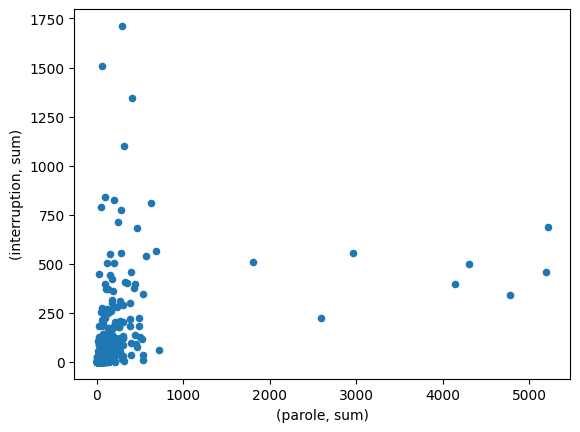

In [25]:
(
    interventions_stats
    .plot
    .scatter(
        x = ('parole', 'sum'),
        y = ('interruption', 'sum'),
    )
)